In [1]:
import pandas as pd
import numpy as np

In [26]:
df=pd.read_csv("UST_Yield_Curve.csv")

In [76]:
y_centred=df-df.mean()

cov_matrix=y_centred.cov()
eigval, eigvec= np.linalg.eig(cov_matrix)

idx=eigval.argsort()[::-1]
eigval= eigval[idx]
eigvec=eigvec[:,idx]

explained_variance_ratio = eigval/eigval.sum()
cum_var=np.cumsum(explained_variance_ratio)
print(cum_var)

[0.90728831 0.98795358 0.99791591 0.99921491 0.99954603 0.99977406
 0.99989323 0.99993632 0.99996855 0.99998758 1.        ]


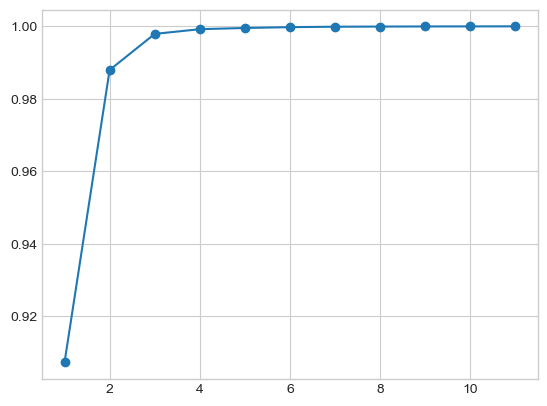

In [77]:
import matplotlib.pyplot as plt

plt.plot(np.arange(1,len(cum_var)+1),cum_var,marker='o')
plt.grid(True)
plt.show()

In [54]:
scores = y_centred.values @ eigvec
scores = pd.DataFrame(
    data=scores,
    index=df.index,
    columns=[f'PC{i+1}' for i in range(eigvec.shape[1])])
scores.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Date,,,,,,,,,,,
2004-01-02,0.268333,3.447335,-0.072142,0.139754,-0.096334,-0.027394,0.066285,0.029156,0.029369,-0.031432,-0.028129
2004-01-05,0.321738,3.464335,-0.116283,0.133283,-0.074414,-0.048042,0.036722,0.038120,0.014959,-0.043881,-0.012479
2004-01-06,0.112224,3.307701,0.009686,0.099932,-0.087278,-0.004899,0.041310,0.060495,0.020887,-0.045366,-0.014321
2004-01-07,0.073276,3.259421,0.008434,0.100378,-0.087422,-0.021047,0.043506,0.047931,0.015834,-0.053913,-0.032440
2004-01-08,0.056677,3.265314,-0.015652,0.094844,-0.092356,-0.047098,0.032341,0.045405,0.014344,-0.045525,-0.023934


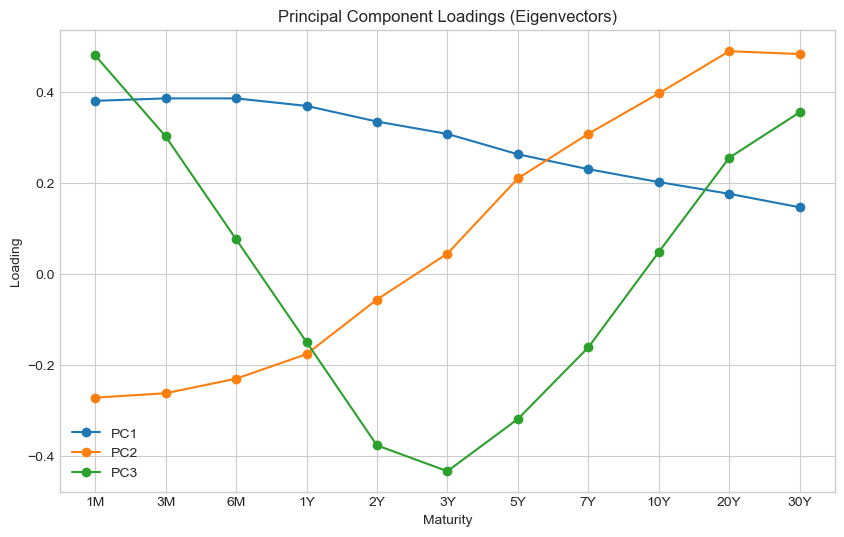

In [73]:
maturities = df.columns.astype(str)  # e.g., ['1M','3M','6M',...]

plt.figure(figsize=(10, 6))

for i in range(3):  # first 3 PCs
    plt.plot(maturities, eigvec[:, i], marker='o', label=f'PC{i+1}')

plt.title('Principal Component Loadings (Eigenvectors)')
plt.xlabel('Maturity')
plt.ylabel('Loading')
plt.legend()
plt.grid(True)
plt.show()

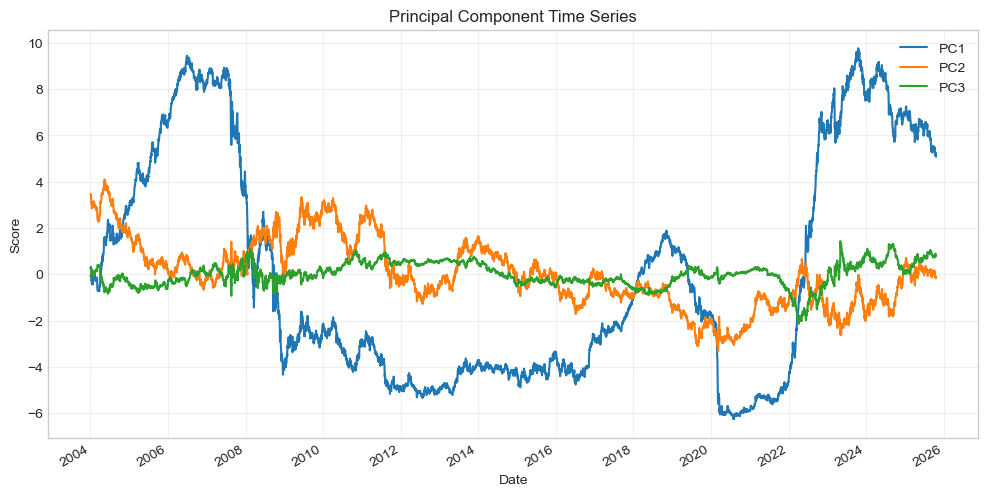

In [75]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# ensure datetime index
scores.index = pd.to_datetime(scores.index)

fig, ax = plt.subplots(figsize=(12, 6))

for i in range(3):
    ax.plot(scores.index, scores.iloc[:, i], label=f'PC{i+1}')

ax.set_title('Principal Component Time Series')
ax.set_xlabel('Date')
ax.set_ylabel('Score')
ax.legend()
ax.grid(True, alpha=0.3)

# Explicitly use pandas datetime converter
ax.xaxis_date()

# set tick marks every 2 years (from 2004 onward)
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

fig.autofmt_xdate()
plt.show()
